# **Combined Analog generator Tool (CAT)** 
# Case study: Darunavir analogs against HIV-1 protease

Easy to use chemical substructures combination using [Combinatorial-program](https://LINKPAPER). For more details, checkout the [Tutorial_CombinatorialSubstructures GitHub](https://github.com/fahhathai/Tutorial_CombinatorialSubstructures.git) and read our manuscript. 

Combinatorial-program: Making chemical substructures combination accessible to all.

**Chuntakaruk H, Hengphasatporn K, Shigeta Y, Aonbangkhen C, Sanghiran Lee V, Khotavivattana T, Rungrotmongkol T, Hannongbua S.** 

<!-- [Chuntakaruk H, Hengphasatporn K, Shigeta Y, Sanghiran Lee V, Khotavivattana T, Rungrotmongkol T, Hannongbua S. Combinatorial-program: Making chemical substructures combination accessible to all.](https://XXX) -->
<!-- *Nature Methods*, 2022](https://www.nature.com/articles/s41592-022-01488-1)  -->

![any name you like](https://drive.google.com/uc?export=view&id=1eU4baqUjCZKrKw0ehnJlSGMp48cNh77N)





In [ ]:
#@title Install dependencies
#@markdown  - Estimated running time is around ~1-3 minutes.
!pip install rdkit --quiet --root-user-action=ignore
!pip install py3Dmol --quiet --root-user-action=ignore
!pip install molplotly --quiet --root-user-action=ignore
!pip install matplotlib --quiet --root-user-action=ignore
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh 
# !chmod +x Miniconda3-latest-Linux-x86_64.sh 
!apt install openbabel 
# !bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local 
# !conda install -q -y -c conda-forge openbabel zlib --yes 
!git clone https://github.com/fahhathai/Combinatorial_program.git

!wget https://github.com/gnina/gnina/releases/download/v1.0.3/gnina
!chmod +x gnina
!./gnina --version

# RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python.
# Ref: https://www.rdkit.org/ and https://colab.research.google.com/drive/1MAZyv3O4-TrI8c1MD4JVmwExDquaprRT?usp=sharing

# Open Babel is a chemical toolbox designed to speak the many languages of chemical data.
# Ref: https://openbabel.org/docs/dev/Installation/install.html and Asst.Prof. Kowit Hengphasatporn, Center for Computational Sciences, University of Tsukuba

# py3Dmol is a simple [IPython/Jupyter](http://jupyter.org/) widget to embed an interactive [3Dmol.js](http://3dmol.org) viewer in a notebook.
# Ref: https://pypi.org/project/py3Dmol/

# GNINA 1.0: molecular docking with deep learning
# Ref: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-021-00522-2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.0 MB/s eta 0:00:00
--2023-04-18 09:33:29--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2023-04-18 09:33:29--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, 

## **The functional groups in the P1, P1′, P2, and P2′ moieties of HIV-1 protease for darunavir**
### Pattern of compound ' s name: P1-P1'-P2-P2'

![any name you like](https://drive.google.com/uc?export=view&id=1XygX4AfTX5flQyvrWN2QPTIILU3c20_X)


In [ ]:
#@title Input substructures

#@markdown ####**Input: sdf or SMILES formats**####
#@markdown >**> >   Check example files in the local system in Google Colab.   < <** 
#@markdown ####>   Select a molecule File 
Upload_sdf_file = True #@param {type: 'boolean'}
Upload_SMILES_file = False #@param {type: 'boolean'}


#@markdown ####>   Enter a list of SMILES
Enter_SMILES = False #@param {type: 'boolean'}

#@markdown ####**Select: moiety you want to modify**####
P1_moiety = True #@param {type: 'boolean'}
P1p_moiety = False #@param {type: 'boolean'}
P2_moiety = False #@param {type: 'boolean'}
P2p_moiety = False #@param {type: 'boolean'}

#----------------------------------------------------------------------------------------------#

import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import itertools 
import molplotly
import py3Dmol
import rdkit
import math
import glob
import sys
import re
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PandasTools import LoadSDF
from google.colab import files
IPythonConsole.ipython_useSVG=True


!mkdir -p /content/P1_moiety_smiFile
!mkdir -p /content/P1p_moiety_smiFile
!mkdir -p /content/P2_moiety_smiFile
!mkdir -p /content/P2p_moiety_smiFile

!mkdir -p /content/P1_moiety_sdfFile
!mkdir -p /content/P1p_moiety_sdfFile
!mkdir -p /content/P2_moiety_sdfFile
!mkdir -p /content/P2p_moiety_sdfFile

DRV_smiles = ["C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1"]
DRV_name = ["DRV"]

#----------------------------------------------------------------------------------------------#

if Upload_sdf_file == True:
  P1_path = "/content/P1_moiety_sdfFile"
  P1p_path = "/content/P1p_moiety_sdfFile"
  P2_path = "/content/P2_moiety_sdfFile"
  P2p_path = "/content/P2p_moiety_sdfFile"

  inputs1 = []
  inputs2 = []
  inputs3 = []
  inputs4 = []
  inputs5 = []
  inputs6 = []
  inputs7 = []
  inputs8 = []

  if P1_moiety == True:
     %cd $P1_path
     uploaded = files.upload()
     print("\n"*2)
  if P1p_moiety == True:
     %cd $P1p_path
     uploaded = files.upload()
     print("\n"*2)
  if P2_moiety == True:
     %cd $P2_path
     uploaded = files.upload()
     print("\n"*2)
  if P2p_moiety == True:
     %cd $P2p_path
     uploaded = files.upload()
     print("\n"*2)

  if len(os.listdir(P1_path)) != 0:   
      P1_list = glob.glob(P1_path + "/*.sdf")
      smiles_format_P1 = "/content/P1_moiety_sdfFile/P1_moiety_sdfFile.smi"
      # inputs1 = []
      # inputs2 = []
      for i in P1_list:
        P1 = i
      print("Modified analog(s) at the P1 moiety")
      !obabel -isdf $P1 -osmi -O $smiles_format_P1 -p 7.4 --ff GAFF
      with open(smiles_format_P1, 'r') as infile:
        data = infile.readlines()
        for l in data:
            each_smi = l.split()          
            inputs1.append(each_smi[0])
            inputs2.append(each_smi[1])  
      print()
      print("The SMILES format of modified analog(s) at the P1 moiety:", inputs1)
      print("The name(s) of modified analog(s) at the P1 moiety:", inputs2)
      print("\n")
      print("###########################################################################")
      print("\n")

  if len(os.listdir(P1p_path)) != 0:   
      P1p_list = glob.glob(P1p_path + "/*.sdf")
      smiles_format_P1p = "/content/P1p_moiety_sdfFile/P1p_moiety_sdfFile.smi"
      # inputs3 = []
      # inputs4 = []
      for i in P1p_list:
        P1p = i
      print("Modified analog(s) at the P1p moiety")
      !obabel -isdf $P1p -osmi -O $smiles_format_P1p -p 7.4 --ff GAFF
      with open(smiles_format_P1p, 'r') as infile:
        data = infile.readlines()
        for l in data:
            each_smi = l.split()          
            inputs3.append(each_smi[0])
            inputs4.append(each_smi[1])  
      print()
      print("The SMILES format of modified analog(s) at the P1p moiety:", inputs3)
      print("The name(s) of modified analog(s) at the P1p moiety:", inputs4)
      print("\n")
      print("###########################################################################")
      print("\n")

  if len(os.listdir(P2_path)) != 0:   
      P2_list = glob.glob(P2_path + "/*.sdf")
      smiles_format_P2 = "/content/P2_moiety_sdfFile/P2_moiety_sdfFile.smi"
      # inputs5 = []
      # inputs6 = []
      for i in P2_list:
        P2 = i
      print("Modified analog(s) at the P2 moiety")
      !obabel -isdf $P2 -osmi -O $smiles_format_P2 -p 7.4 --ff GAFF
      with open(smiles_format_P2, 'r') as infile:
        data = infile.readlines()
        for l in data:
            each_smi = l.split()          
            inputs5.append(each_smi[0])
            inputs6.append(each_smi[1])  
      print()
      print("The SMILES format of modified analog(s) at the P2 moiety:", inputs5)
      print("The name(s) of modified analog(s) at the P2 moiety:", inputs6)
      print("\n")
      print("###########################################################################")
      print("\n")

  if len(os.listdir(P2p_path)) != 0:   
      P2p_list = glob.glob(P2p_path + "/*.sdf")
      smiles_format_P2p = "/content/P2p_moiety_sdfFile/P2p_moiety_sdfFile.smi"
      # inputs7 = []
      # inputs8 = []
      for i in P2p_list:
        P2p = i
      print("Modified analog(s) at the P2p moiety")
      !obabel -isdf $P2p -osmi -O $smiles_format_P2p -p 7.4 --ff GAFF
      with open(smiles_format_P2p, 'r') as infile:
        data = infile.readlines()
        for l in data:
            each_smi = l.split()          
            inputs7.append(each_smi[0])
            inputs8.append(each_smi[1])  
      print()
      print("The SMILES format of modified analog(s) at the P2p moiety:", inputs7)
      print("The name(s) of modified analog(s) at the P2p moiety:", inputs8)
      print("\n")
      print("###########################################################################")
      print("\n")

#----------------------------------------------------------------------------------------------#

if Upload_SMILES_file == True:
  P1_path = "/content/P1_moiety_smiFile"
  P1p_path = "/content/P1p_moiety_smiFile"
  P2_path = "/content/P2_moiety_smiFile"
  P2p_path = "/content/P2p_moiety_smiFile"

  if P1_moiety == True:
     %cd $P1_path
     uploaded = files.upload()
     print("\n"*2)
  if P1p_moiety == True:
     %cd $P1p_path
     uploaded = files.upload()
     print("\n"*2)
  if P2_moiety == True:
     %cd $P2_path
     uploaded = files.upload()
     print("\n"*2)
  if P2p_moiety == True:
     %cd $P2p_path
     uploaded = files.upload()
     print("\n"*2)
     
  if len(os.listdir(P1_path)) != 0:  
    P1_list = glob.glob(P1_path + "/*.txt")
    for i in P1_list:
      P1 = i
    P1_df = pd.read_csv(P1, header=None, names=["Merged_information"]) 
    P1_newdf = P1_df["Merged_information"].str.split(" ", n = 1, expand = True)   
    P1_df["SMILES"]= P1_newdf[0]   
    P1_df["Compound_ID"]= P1_newdf[1] 
    P1_df = P1_df.drop(columns=['Merged_information'])   
    inputs1 = P1_df['SMILES'].tolist()
    inputs2 = P1_df['Compound_ID'].tolist()
    print("Modified analog(s) at the P1 moiety")
    print()
    print("The SMILES format of modified analog(s) at the P1 moiety:", inputs1)
    print("The name(s) of modified analog(s) at the P1 moiety:", inputs2)
    print("\n")
    print("###########################################################################")
    print("\n")

  if len(os.listdir(P1p_path)) != 0:  
    P1p_list = glob.glob(P1p_path + "/*.txt")
    for j in P1p_list:
      P1p = j
    P1p_df = pd.read_csv(P1p, header=None, names=["Merged_information"]) 
    P1p_newdf = P1p_df["Merged_information"].str.split(" ", n = 1, expand = True)   
    P1p_df["SMILES"]= P1p_newdf[0]   
    P1p_df["Compound_ID"]= P1p_newdf[1] 
    P1p_df = P1p_df.drop(columns=['Merged_information'])   
    inputs3 = P1p_df['SMILES'].tolist()
    inputs4 = P1p_df['Compound_ID'].tolist()
    print("Modified analog(s) at the P1p moiety")
    print()
    print("The SMILES format of modified analog(s) at the P1' moiety:", inputs3)
    print("The name(s) of modified analog(s) at the P1' moiety:", inputs4)
    print("\n")
    print("###########################################################################")
    print("\n")

  if len(os.listdir(P2_path)) != 0:  
    P2_list = glob.glob(P2_path + "/*.txt")
    for k in P2_list:
      P2 = k
    P2_df = pd.read_csv(P2, header=None, names=["Merged_information"]) 
    P2_newdf = P2_df["Merged_information"].str.split(" ", n = 1, expand = True)   
    P2_df["SMILES"]= P2_newdf[0]   
    P2_df["Compound_ID"]= P2_newdf[1] 
    P2_df = P2_df.drop(columns=['Merged_information'])   
    inputs5 = P2_df['SMILES'].tolist()
    inputs6 = P2_df['Compound_ID'].tolist()
    print("Modified analog(s) at the P2 moiety")
    print()
    print("The SMILES format of modified analog(s) at the P2 moiety:", inputs5)
    print("The name(s) of modified analog(s) at the P2 moiety:", inputs6)
    print("\n")
    print("###########################################################################")
    print("\n")

  if len(os.listdir(P2p_path)) != 0:  
    P2p_list = glob.glob(P2p_path + "/*.txt")
    for l in P2p_list:
      P2p = l
    P2p_df = pd.read_csv(P2p, header=None, names=["Merged_information"]) 
    P2p_newdf = P2p_df["Merged_information"].str.split(" ", n = 1, expand = True)   
    P2p_df["SMILES"]= P2p_newdf[0]   
    P2p_df["Compound_ID"]= P2p_newdf[1] 
    P2p_df = P2p_df.drop(columns=['Merged_information'])   
    inputs7 = P2p_df['SMILES'].tolist()
    inputs8 = P2p_df['Compound_ID'].tolist()
    print("Modified analog(s) at the P2p moiety")
    print()
    print("The SMILES format of modified analog(s) at the P2' moiety:", inputs7)
    print("The name(s) of modified analog(s) at the P2' moiety:", inputs8)
    print("\n")
    print("###########################################################################")
    print("\n")

#----------------------------------------------------------------------------------------------#

if Enter_SMILES == True:
  inputs1 = []
  inputs2 = []
  inputs3 = []
  inputs4 = []
  inputs5 = []
  inputs6 = []
  inputs7 = []
  inputs8 = []

  if P1_moiety == True:
    print("Modified analog(s) at the P1 moiety")
    print()
    num1 = int(input('Please enter the number of compound(s): '))
    print()
    for m in range(1, num1+1):
      print('>>>>>> Compound', m) 
      user_input1 = input('Please enter SMILES format: ')
      user_input2 = input('Please enter name(s) of modified analog(s): ')
      print()
      inputs1.append(user_input1)
      inputs2.append(user_input2)
    print()
    print("The SMILES format of modified analog(s) at the P1 moiety:", inputs1)
    print("The name(s) of modified analog(s) at the P1 moiety:", inputs2)
    print("\n")
    print("###########################################################################")
    print("\n")

  if P1p_moiety == True:
    print("Modified analog(s) at the P1p moiety")
    print()
    num2 = int(input('Please enter the number of compound(s): '))
    print()
    for n in range(1, num2+1):
      print('>>>>>> Compound', n) 
      user_input3 = input('Please enter SMILES format: ')
      user_input4 = input('Please enter name(s) of modified analog(s): ')
      print()
      inputs3.append(user_input3)
      inputs4.append(user_input4)
    print()
    print("The SMILES format of modified analog(s) at the P1' moiety:", inputs3)
    print("The name(s) of modified analog(s) at the P1' moiety:", inputs4)
    print("\n")
    print("###########################################################################")
    print("\n")

  if P2_moiety == True:
    print("Modified analog(s) at the P2 moiety")
    print()
    num3 = int(input('Please enter the number of compound(s): '))
    print()
    for o in range(1, num3+1):
      print('>>>>>> Compound', o) 
      user_input5 = input('Please enter SMILES format: ')
      user_input6 = input('Please enter name(s) of modified analog(s): ')
      print()
      inputs5.append(user_input5)
      inputs6.append(user_input6)
    print()
    print("The SMILES format of modified analog(s) at the P2 moiety:", inputs5)
    print("The name(s) of modified analog(s) at the P2 moiety:", inputs6)
    print("\n")
    print("###########################################################################")
    print("\n")

  if P2p_moiety == True:
    print("Modified analog(s) at the P2p moiety")
    print()  
    num4 = int(input('Please enter the number of compound(s): '))
    print()
    for p in range(1, num4+1):
      print('>>>>>> Compound', p) 
      user_input7 = input('Please enter SMILES format: ')
      user_input8 = input('Please enter name(s) of modified analog(s): ')
      print()
      inputs7.append(user_input7)
      inputs8.append(user_input8)
    print()
    print("The SMILES format of modified analog(s) at the P2' moiety:", inputs7)
    print("The name(s) of modified analog(s) at the P2' moiety:", inputs8)
    print("\n")
    print("###########################################################################")
    print("\n")

/content/P1_moiety_sdfFile


Saving file_P1.sdf to file_P1.sdf



Modified analog(s) at the P1 moiety
4 molecules converted

The SMILES format of modified analog(s) at the P1 moiety: ['C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1cc(ccc1)C(=O)[O-])[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc(cc1)c1ccncc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccc2c(c1)cnc(c2)C(C)C)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1', 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1c2c([nH]c1)cccc2)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1']
The name(s) of modified analog(s) at the P1 moiety: ['A1', 'A2', 'A3', 'A4']


###########################################################################




In [ ]:
#@title Generate analogs

print("DRV is now spliiting")
print("The core structure has been kept")
print("")

# Define core structures
core1 = 'OC(=O)N[C@@H]'
core2 = '[C@H](O)CN'
core3 = 'S(=O)(=O)'

# Create lists to collect fragments: F1, F2, F3, and F4
# Note: F1 = P2, F2 = P1, F3 = P1', F4 = P2'
lst_F1 = [] #P2  inputs5
lst_F2 = [] #P1  inputs1
lst_F3 = [] #P1' inputs3
lst_F4 = [] #P2' inputs7


# Collect fragments
# 1. DRV --> split all cores (collect 0-0-0-0)

DRV_split_lst = re.split("OC\\(=O\\)N\\[C@@H\\]|\\[C@H\\]\\(O\\)CN|S\\(=O\\)\\(=O\\)",DRV_smiles[0]) # split core ('N(CC(O)C', 'NC(=O)', 'S(=O)(=O)')
DRV_split_lst = list(filter(None, DRV_split_lst)) 
# print(DRV_split_lst)
for i in range(len(DRV_split_lst)):
  eval("lst_F"+str(i+1)).append(DRV_split_lst[i])


# 2. Collect F2 (P1) --> split core1 and 2 (collect X-0-0-0)
# Note: collect members at index 1 of split list

for i in inputs1:
  split_lst = re.split("OC\\(=O\\)N\\[C@@H\\]|\\[C@H\\]\\(O\\)CN",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F2.append(split_lst[1])
print("DRV substructures P1  : ", lst_F2)

# 3. Collect F3 (P1') --> split core2 and 3 (collect 0-X-0-0)
# Note: collect members at index 1 of split list
for i in inputs3:
  split_lst = re.split("\\[C@H\\]\\(O\\)CN|S\\(=O\\)\\(=O\\)",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F3.append(split_lst[1])
print("DRV substructures P1' : ", lst_F3)

# 4. Collect F1 (P2) --> use a special core to split:
# Special core: 'OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1' 
# Note:  - In some cases of splitting F1, there are two separated fragments therefore the special core is needed.
#        - The core are all sequences except F1 and extra F1 (core 1 + F2 + core 2 + F3 + core 3 + F4). 
#        - Collect 0-0-X-0
#        - Collect all members in split list
for i in inputs5:
  split_lst = re.split("OC\\(=O\\)N\\[C@@H\\]\\(Cc1ccccc1\\)\\[C@H\\]\\(O\\)CN\\(CC\\(C\\)C\\)S\\(=O\\)\\(=O\\)c1ccc\\(N\\)cc1",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F1.append(split_lst)
lst_F1[0] = ['C1O[C@H]2OCC[C@H]2[C@H]1'] #change string F1 of DRV to list
print("DRV substructures P2  : ", lst_F1) #lst_F1[i[2]]

# 5. Collect F4 (P2') --> split core3 (collect 0-0-0-X)
# Note: collect members at index 1 of split list
for i in inputs7:
  split_lst = re.split("S\\(=O\\)\\(=O\\)",i) # Add \\ before '(,' or ')' and '[' or ']' to convert them to string
  split_lst = list(filter(None, split_lst)) # remove empty string
  lst_F4.append(split_lst[1])
print("DRV substructures P2' : ", lst_F4)

DRV is now spliiting
The core structure has been kept

DRV substructures P1  :  ['(Cc1ccccc1)', '(Cc1cc(ccc1)C(=O)[O-])', '(Cc1ccc(cc1)c1ccncc1)', '(Cc1ccc2c(c1)cnc(c2)C(C)C)', '(Cc1c2c([nH]c1)cccc2)']
DRV substructures P1' :  ['(CC(C)C)']
DRV substructures P2  :  [['C1O[C@H]2OCC[C@H]2[C@H]1']]
DRV substructures P2' :  ['c1ccc(N)cc1']


In [ ]:
#@title List of analogs

# Create index lists according to each fragment
inputs2 = DRV_name + inputs2
inputs4 = DRV_name + inputs4
inputs6 = DRV_name + inputs6
inputs8 = DRV_name + inputs8
P1_index = [i for i in range(len(inputs2))]
P1p_index = [i for i in range(len(inputs4))]
P2_index = [i for i in range(len(inputs6))]
P2p_index = [i for i in range(len(inputs8))]
# Select some fragments following id
# For instance
# P1_index = [0,4,9,10,12,19]
# P1p_index = [0,5,8,13,20]
# P2_index = [0,2,3,9,10,12,13,14,19]
# P2p_index = [0,3,10,19]
print("P1_index  : ", P1_index)
print("P1'_index : ", P1p_index)
print("P2_index  : ", P2_index)
print("P2'_index : ", P2p_index)

# Combination of all possible index
all_index = [P1_index, P1p_index, P2_index, P2p_index]
permute_all_index = list(itertools.product(*all_index))
# permute_all_index[0:150000:8000] #Sampling some members of the list to show

# Use permuted index to select combined fragments
# Adding string according to this equation: P2 + core1 + P1 + core2 + P1' + core3 + P2'
permute_smile_lst = []
for i in permute_all_index:
  #First merge core1 + P1 + core2 + P1' + core3 + P2'
  all_part_except_F1 = core1 + lst_F2[i[0]] + core2 + lst_F3[i[1]] + core3 + lst_F4[i[3]]
  if len(lst_F1[i[2]]) > 1: #Indicating F1 having extra fragment 
    all_part = lst_F1[i[2]][0] + all_part_except_F1 + lst_F1[i[2]][1]
  else: #F1 has no extra fragment
    all_part = lst_F1[i[2]][0] + all_part_except_F1 
  permute_smile_lst.append(all_part)
# permute_smile_lst[0:150000:8000] #Sampling some members of the list to show

# # Create id list based on permute_all_index
# id_lst = []
# for i in permute_all_index:
#   str_index = str(i[0]) + '-' + str(i[1]) + '-' + str(i[2]) + '-' + str(i[3])
#   id_lst.append(str_index)
# # id_lst[0:150000:8000]

# Create name list based on permute_all_index
name_lst = []
for i in permute_all_index:
  name_index = inputs2[i[0]] + '-' + inputs4[i[1]] + '-' + inputs6[i[2]] + '-' + inputs8[i[3]]
  name_lst.append(name_index)

# Create a dictionary which keys are id and values are combined smile files
smile_dict = {name_lst[i]:permute_smile_lst[i] for i in range(len(permute_all_index))}
print()
print("SMILES dictionary : ")
# {key:value for (key,value) in [i for i in smile_dict.items()][0:150000:8000]} #Sampling some members of the dictionary to show
{key:value for (key,value) in [i for i in smile_dict.items()][0:256:50]} #Sampling some members of the dictionary to show

P1_index  :  [0, 1, 2, 3, 4]
P1'_index :  [0]
P2_index  :  [0]
P2'_index :  [0]

SMILES dictionary : 


{'DRV-DRV-DRV-DRV': 'C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1'}

In [ ]:
#@title Find your analogs

#@markdown  - Use "," (space) to specify inter-modified analogs for showing SMILES format. For example 0-0-1-2 1-4-0-1 0-7-8-1 for three modified analogs
Compound_ID = "DRV-DRV-DRV-DRV" #@param {type:"string"}

#Search smile having id 0-1-0-0 in the dictionary
Lst_compound_ID = []
Lst_compound_ID.append(Compound_ID) 
for i in Lst_compound_ID:
  Lst_compound_ID = i.split(",")  
  for j in Lst_compound_ID:
    print("Compound_ID : ", j)
    print("SMILES      : ", smile_dict[j])
    print()

# print("Compound_ID : ", Compound_ID)
# print("SMILES    : ", smile_dict[Code_of_compound])

#Check the number of compounds
print()
print("######################################### Total number of analogs :", len(smile_dict), "analogs #########################################")

Compound_ID :  DRV-DRV-DRV-DRV
SMILES      :  C1O[C@H]2OCC[C@H]2[C@H]1OC(=O)N[C@@H](Cc1ccccc1)[C@H](O)CN(CC(C)C)S(=O)(=O)c1ccc(N)cc1


######################################### Total number of analogs : 5 analogs #########################################


In [ ]:
#@title Make an analog database in 3D structure
#@markdown  - Estimated running time is around ~1-2 minutes.

# Convert dictionary to dataframe form using pandas package
dataframe_cmp = pd.DataFrame(smile_dict.items(), columns=['Compound_ID', 'SMILES'])
dataframe_cmp.to_csv('/content/dataframe_cmp1.csv') 

# Select some chemical compounds (for instance, five compounds)
# dataframe_cmp2 = dataframe_cmp.iloc[0:200] 
# dataframe_cmp2.to_csv('/content/dataframe_cmp2.csv') 

# Convert smiles format to three-dimentional structure form
# to convert three-dimentional structure form e.g. sdf and mol, RDKit and Open babel are performed)
# Ref: https://gist.github.com/leelasd/43219a222bf57d3e01c2c83f2ad9b031

df = dataframe_cmp
mols = [Chem.MolFromSmiles(smi) for smi in df.SMILES]
hmols = [Chem.AddHs(m) for m in mols]

for mol in hmols:
    AllChem.EmbedMolecule(mol,AllChem.ETKDG())
    # print(AllChem.UFFOptimizeMolecule(mol,1000))
smiles = list(df.SMILES)
sid = list(df.Compound_ID)
libs = df[df.columns[0]]
writer = Chem.SDWriter('/content/TEST.sdf')

for n in range(len(libs)):
    hmols[n].SetProp("_Library","%s"%libs[n])
    hmols[n].SetProp("_Name","%s"%sid[n])
    hmols[n].SetProp("_SourceID","%s"%sid[n])
    hmols[n].SetProp("_SMILES","%s"%smiles[n])
    writer.write(hmols[n])
writer.close()

!obabel -isdf /content/TEST.sdf -osdf -O /content/3D_Analogs.sdf -p 7.4 --ff GAFF

5 molecules converted


In [ ]:
#@title Visulization in 3D structure
import py3Dmol
v = py3Dmol.view()                                                
v.addModel(open('/content/3D_Analogs.sdf').read())
v.setStyle({'stick':{'colorscheme':'greenCarbon'}})
v.animate({'interval':500})
v.zoomTo()

# v = py3Dmol.view()
# v.addModel(open('/content/rec.pdb').read())
# v.setStyle({'cartoon':{},'stick':{'radius':.1}})
# v.addModel(open('/content/lig.pdb').read())
# v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.125}})
# v.addModelsAsFrames(open('/content/redocked.sdf').read())
# v.setStyle({'model':2},{'stick':{'colorscheme':'greenCarbon'}})
# v.zoomTo({'model':1})
# v.rotate(90)
# v.animate({'interval':1000})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

,ID,SMILES,ROMol,Molecular_weight,HBA,HBD,LogP,Rot_Bond,TPSA,Number_of_Rings
0,DRV-DRV-DRV-DRV,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...,,547.235222,8,3,2.3753,11,140.42,4
1,A1-DRV-DRV-DRV,CC(C)CN(C[C@@H](O)[C@H](Cc1cccc(C(=O)[O-])c1)N...,,590.217774,10,3,0.7388,12,180.55,4
2,A2-DRV-DRV-DRV,CC(C)CN(C[C@@H](O)[C@H](Cc1ccc(-c2ccncc2)cc1)N...,,624.261771,9,3,3.4373,12,153.31,5
3,A3-DRV-DRV-DRV,CC(C)CN(C[C@@H](O)[C@H](Cc1ccc2cc(C(C)C)ncc2c1...,,640.293071,9,3,4.0469,12,153.31,5
4,A4-DRV-DRV-DRV,CC(C)CN(C[C@@H](O)[C@H](Cc1c[nH]c2ccccc12)NC(=...,,586.246121,8,4,2.8566,11,156.21,5

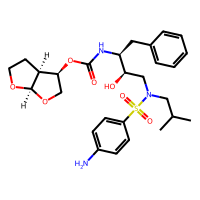
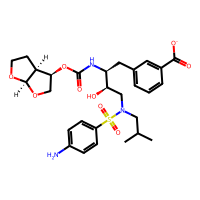
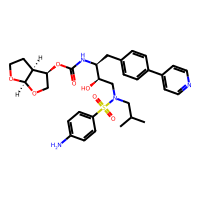
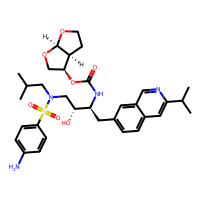
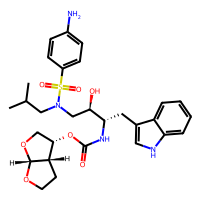

In [ ]:
#@title ADME properties prediction

sdf2 = "/content/3D_Analogs.sdf"
df2 = PandasTools.LoadSDF(sdf2, embedProps=True, molColName=None, smilesName='SMILES')
PandasTools.AddMoleculeColumnToFrame(df2, smilesCol='SMILES')
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_rows', None)
df2["Molecular_weight"] = df2["ROMol"].apply(Descriptors.ExactMolWt)
df2["HBA"] = df2["ROMol"].apply(Descriptors.NumHAcceptors)
df2["HBD"] = df2["ROMol"].apply(Descriptors.NumHDonors)
df2["LogP"] = df2["ROMol"].apply(Descriptors.MolLogP)
df2["Rot_Bond"] = df2["ROMol"].apply(rdkit.Chem.rdMolDescriptors.CalcNumRotatableBonds)
df2["TPSA"] = df2["ROMol"].apply(rdkit.Chem.rdMolDescriptors.CalcTPSA)
df2["Number_of_Rings"] = df2["ROMol"].apply(Descriptors.rdMolDescriptors.CalcNumRings)
df2.to_csv("/content/InformationOfCmp.csv")
df2

In [ ]:
#@title Solubility prediction

# Molplotly is an add-on to plotly built on RDKit which allows 2D images of molecules to be shown in plotly figures when hovering over the data points.
# Ref: https://github.com/wjm41/molplotly

df_solu = pd.read_csv('/content/InformationOfCmp.csv')
df_solu['y_true'] = df_solu['LogP']

fig_strip = px.strip(df_solu.sort_values('Number_of_Rings'), # sorting so that the colorbar is sorted!
                     x='Number_of_Rings',
                     y='y_true',
                     color='Number_of_Rings',
                     labels={'y_true': 'Measured_solubility'},
                     width=1000,
                     height=800)

app_strip = molplotly.add_molecules(fig=fig_strip,
                          df=df_solu,
                          smiles_col='SMILES',
                          title_col='ID',
                          color_col='Number_of_Rings',
                          caption_transform={'Measured_solubility': lambda x: f"{x:.2f}"},
                          wrap=True,
                          wraplen=25,
                          width=150,
                          show_coords=True)

app_strip.run_server(mode='inline', port=8705, height=850)

Dash is running on http://127.0.0.1:8705/



/usr/local/lib/python3.9/dist-packages/molplotly/main.py:78: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.

INFO:dash.dash:Dash is running on http://127.0.0.1:8705/



<IPython.core.display.Javascript object>

In [ ]:
#@title The relationship analysis between molecular weight, measured solubility, and TPSA

# Molplotly is an add-on to plotly built on RDKit which allows 2D images of molecules to be shown in plotly figures when hovering over the data points.
# Ref: https://github.com/wjm41/molplotly

df_solu['Measured_solubility'] = df_solu['LogP']
fig_3d = px.scatter_3d(df_solu, 
                       x="TPSA", 
                       y="Measured_solubility", 
                       z="Molecular_weight", 
                       width=900,
                       height=700)

app_3d = molplotly.add_molecules(
    fig=fig_3d,
    df=df_solu,
    smiles_col="SMILES",
    caption_cols=["TPSA", "Measured_solubility", "Molecular_weight"],
    show_coords=False,
)

app_3d.run_server(mode="inline", port=8704, height=850)

Dash is running on http://127.0.0.1:8704/



INFO:dash.dash:Dash is running on http://127.0.0.1:8704/



<IPython.core.display.Javascript object>

In [ ]:
#@title Drug-likeness prediction based on beyond rule of five (bRo5)

# Molecular filtering: ADME and lead-likeness criteria
# Ref: https://projects.volkamerlab.org/teachopencadd/talktorials/T002_compound_adme.html

def calculate_bRo5_properties(smiles):
    # RDKit molecule from SMILES
    df2 = Chem.MolFromSmiles(smiles)
    # Calculate bRo5-relevant chemical properties
    Molecular_weight = Descriptors.ExactMolWt(df2)
    HBA = Descriptors.NumHAcceptors(df2)
    HBD = Descriptors.NumHDonors(df2)
    LogP = Descriptors.MolLogP(df2)
    # Check if bRo5 conditions fulfilled
    conditions = [Molecular_weight <= 1000, HBA <= 15, HBD <= 6, LogP <= 10]
    bRo5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series([bRo5_fulfilled], index=["bRo5_fulfilled"],)

# This takes a couple of seconds
bRo5_properties = df2["SMILES"].apply(calculate_bRo5_properties)
# bRo5_properties.head() ##

df2 = pd.concat([df2, bRo5_properties], axis=1)
# df2.head() ##

# Note that the column "ro5_fulfilled" contains boolean values.
# Thus, we can use the column values directly to subset data.
# Note that ~ negates boolean values.
df2_bRo5_fulfilled = df2[df2["bRo5_fulfilled"]]
df2_bRo5_violated = df2[~df2["bRo5_fulfilled"]]
print(f"# Compounds in unfiltered data set: {df2.shape[0]}")
print(f"# Compounds in filtered data set: {df2_bRo5_fulfilled.shape[0]}")
print(f"# Compounds not compliant with the bRo5: {df2_bRo5_violated.shape[0]}")

def calculate_mean_std(dataframe):
    # Generate descriptive statistics for property columns
    stats = dataframe.describe()
    # Transpose DataFrame (statistical measures = columns)
    stats = stats.T
    # Select mean and standard deviation
    stats = stats[["mean", "std"]]
    return stats
df2_bRo5_fulfilled_stats = calculate_mean_std(df2_bRo5_fulfilled[["Molecular_weight", "HBA", "HBD", "LogP"]])
# df2_bRo5_fulfilled_stats ##

def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

def plot_radar(y,thresholds,scaled_threshold,properties_labels,y_max=None,output_path=None,):
    # Define radial x-axes angles -- uses our helper function!
    x = _define_radial_axes_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = y.append(y.iloc[0])

    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * 5, "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(range(1, y_max),["5" if i == scaled_threshold else "" for i in range(1, y_max)],fontsize=16,)

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(x=angle,y=y_max + 1,s=label,size=16,horizontalalignment=ha,verticalalignment="center",)

    # Add legend relative to top-left plot
    labels = ("Beyond rule of five area", "Mean", "Mean + SD", "Mean - SD")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

thresholds = {"Molecular_weight": 1000, "HBA": 15, "HBD": 6, "LogP": 10}
scaled_threshold = 5
properties_labels = ["Molecular weight (Da) / 200","# HBA / 3","# HBD","LogP / 2",]
y_max = 8
plot_radar(df2_bRo5_fulfilled_stats,thresholds,scaled_threshold,properties_labels,y_max,)